# Stock Market Analysis and Prediction using Time Series Analysis

1. What was the change in price of the stock over time?
2. What was the daily return of the stock on average?
3. What was the moving average of the various stocks?
4. What was the correlation between different stocks' closing prices?
5. What was the correlation between different stocks' daily returns?
6. How to calculate the Sharpe ratio of a stock?
7. How can we attempt to predict future stock behavior?

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_datareader as web
from datetime import datetime
from scipy.stats import norm
import warnings
import math

%matplotlib inline
warnings.filterwarnings('ignore')

C:\Users\Rajde\anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


### Importing Datasets using pandas datareader

In [2]:
end = datetime.now()
start = datetime(end.year-10, end.month, end.day)

rel = web.DataReader('RELIANCE.NS','yahoo',start,end)
hdfc = web.DataReader('HDFCBANK.NS','yahoo',start,end)
tcs = web.DataReader('TCS.NS','yahoo',start,end)
infy = web.DataReader('INFY.NS','yahoo',start,end)

In [3]:
rel.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-05-21,499.924988,488.049988,494.950012,497.774994,8762694.0,427.504791
2010-05-24,524.474976,508.225006,509.000000,511.325012,11304034.0,439.141998
2010-05-25,512.500000,491.375000,512.500000,492.825012,11541592.0,423.253540
2010-05-26,505.000000,495.500000,497.450012,504.024994,6275326.0,432.872467
2010-05-27,513.849976,500.799988,505.500000,511.125000,12528690.0,438.970154


In [4]:
hdfc.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-05-21,185.000000,180.110001,182.000000,182.654999,5498620.0,141.889206
2010-05-24,186.750000,181.104996,183.520004,182.455002,4810910.0,141.733871
2010-05-25,182.000000,178.500000,181.179993,180.375000,5534350.0,140.118088
2010-05-26,185.324997,181.229996,181.279999,182.774994,7001390.0,141.982437
2010-05-27,190.699997,181.100006,181.500000,189.660004,11309860.0,147.330811


In [5]:
tcs.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-05-21,362.950012,342.625000,355.0,359.350006,2675092.0,269.237335
2010-05-24,365.000000,356.350006,362.5,358.799988,2885428.0,268.825287
2010-05-25,357.000000,345.774994,354.0,349.774994,2297366.0,262.063446
2010-05-26,372.399994,352.049988,354.0,369.000000,3689464.0,276.467468
2010-05-27,374.975006,363.600006,367.5,370.924988,6883872.0,277.909760


In [6]:
infy.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-05-21,326.000000,319.794006,321.000000,322.718994,7127200.0,127.850540
2010-05-24,328.750000,322.406006,326.375000,325.049988,7186104.0,128.774033
2010-05-25,323.355988,313.763000,323.355988,316.674988,8838128.0,125.456123
2010-05-26,329.987000,319.531006,320.631012,327.631012,7868856.0,136.250336
2010-05-27,333.000000,324.388000,328.475006,330.419006,11312696.0,137.409760


In [7]:
rel.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2463 entries, 2010-05-21 to 2020-05-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2463 non-null   float64
 1   Low        2463 non-null   float64
 2   Open       2463 non-null   float64
 3   Close      2463 non-null   float64
 4   Volume     2463 non-null   float64
 5   Adj Close  2463 non-null   float64
dtypes: float64(6)
memory usage: 134.7 KB


In [8]:
hdfc.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2463 entries, 2010-05-21 to 2020-05-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2463 non-null   float64
 1   Low        2463 non-null   float64
 2   Open       2463 non-null   float64
 3   Close      2463 non-null   float64
 4   Volume     2463 non-null   float64
 5   Adj Close  2463 non-null   float64
dtypes: float64(6)
memory usage: 134.7 KB


In [9]:
tcs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2463 entries, 2010-05-21 to 2020-05-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2463 non-null   float64
 1   Low        2463 non-null   float64
 2   Open       2463 non-null   float64
 3   Close      2463 non-null   float64
 4   Volume     2463 non-null   float64
 5   Adj Close  2463 non-null   float64
dtypes: float64(6)
memory usage: 134.7 KB


In [10]:
infy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2463 entries, 2010-05-21 to 2020-05-21
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       2463 non-null   float64
 1   Low        2463 non-null   float64
 2   Open       2463 non-null   float64
 3   Close      2463 non-null   float64
 4   Volume     2463 non-null   float64
 5   Adj Close  2463 non-null   float64
dtypes: float64(6)
memory usage: 134.7 KB


In [11]:
rel.describe()

,High,Low,Open,Close,Volume,Adj Close
count,2463.000000,2463.000000,2463.000000,2463.000000,2.463000e+03,2463.000000
mean,670.708428,655.142523,663.146267,662.542140,8.110060e+06,633.706860
std,339.084683,330.738343,335.166498,334.723866,5.039396e+06,349.417561
min,341.399994,336.524994,337.500000,338.049988,0.000000e+00,295.313965
25%,439.237503,428.587509,434.599991,434.200012,5.195378e+06,395.792130
50%,505.000000,495.875000,500.100006,500.049988,6.856690e+06,460.728851
75%,909.475006,888.574982,897.775024,899.674988,9.401160e+06,889.236450
max,1617.550049,1596.099976,1615.000000,1609.949951,6.523004e+07,1609.949951


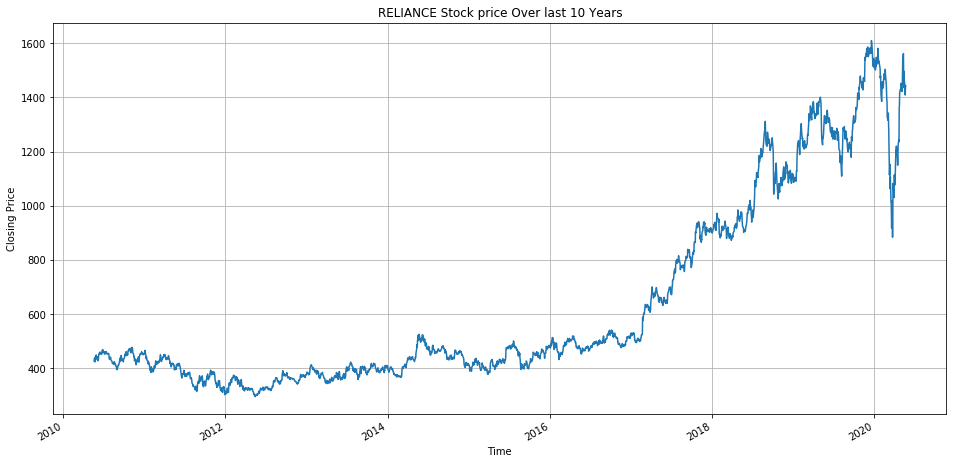

In [12]:
#Closing Price Trend of Reliance over the last 10 years
rel['Adj Close'].plot(figsize=(16,8),title='RELIANCE Stock price Over last 10 Years',grid=True)
plt.xlabel('Time')
plt.ylabel('Closing Price')
plt.show()

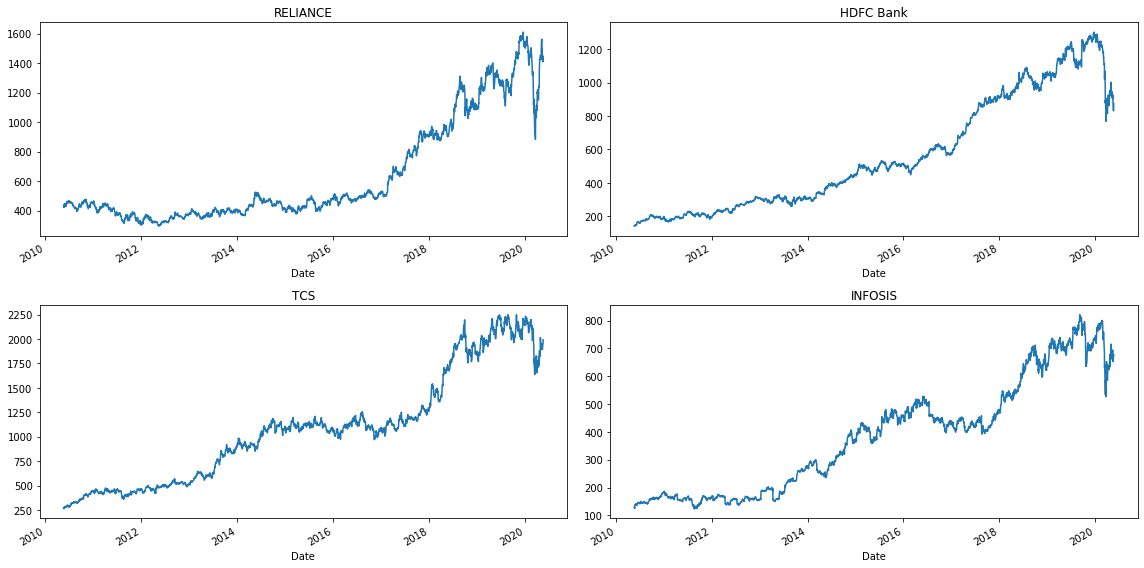

In [13]:
#Closing Price Trend of Stocks over the last 10 years
fig,axes = plt.subplots(nrows=2,ncols=2)
fig.set_figheight(8)
fig.set_figwidth(16)

rel['Adj Close'].plot(ax=axes[0,0])
axes[0,0].set_title('RELIANCE')
hdfc['Adj Close'].plot(ax=axes[0,1])
axes[0,1].set_title('HDFC Bank')
tcs['Adj Close'].plot(ax=axes[1,0])
axes[1,0].set_title('TCS')
infy['Adj Close'].plot(ax=axes[1,1])
axes[1,1].set_title('INFOSIS')

fig.tight_layout()

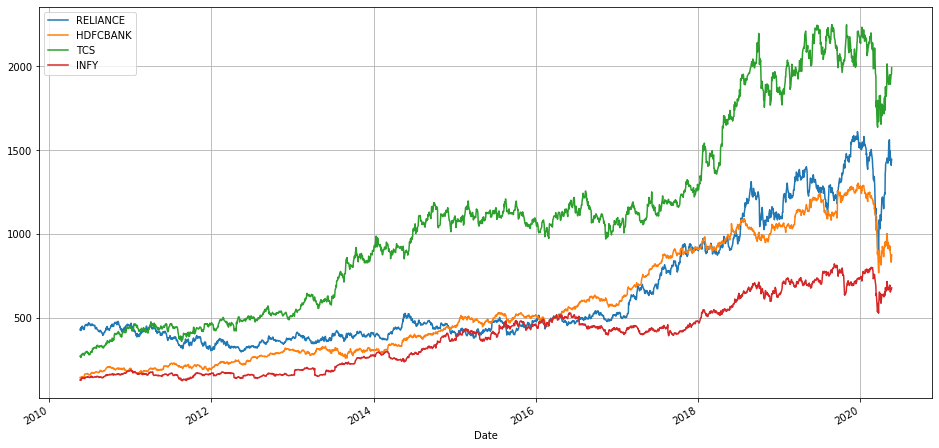

In [14]:
#Closing Price trend Comparision analysis over last 10 years
rel['Adj Close'].plot(figsize=(16,8), label='RELIANCE',grid=True)
hdfc['Adj Close'].plot(label='HDFCBANK',grid=True)
tcs['Adj Close'].plot(label='TCS',grid=True)
infy['Adj Close'].plot(label='INFY',grid=True)
plt.legend();

10 years ago, a unit share price TCS stock was less Reliance, But over the years TCS Stocks gained more value than the Reliance Stocks.
Whereas we can observe from the plot that HDFC Bank and INFOSIS had similar price for a unit share of the stock but over the years HDFCBANK gave more profit to its shareholders as its Stocks performed well in comparision to INFOSIS stocks.

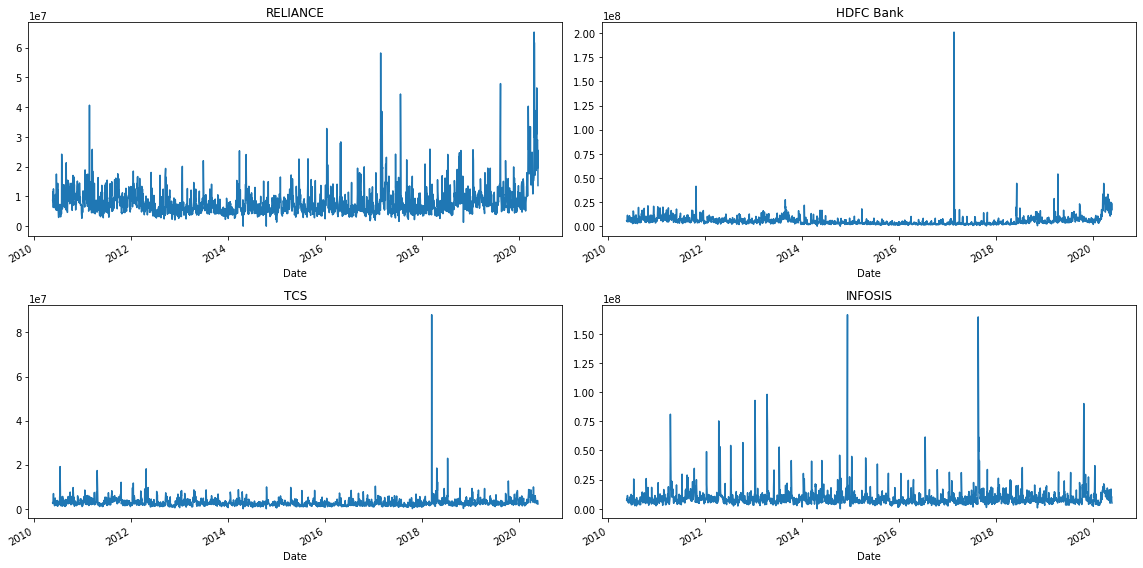

In [15]:
#Volume of stocks traded each day for lasat 10 years
fig,axes = plt.subplots(nrows=2,ncols=2)
fig.set_figheight(8)
fig.set_figwidth(16)

rel['Volume'].plot(ax=axes[0,0])
axes[0,0].set_title('RELIANCE')
hdfc['Volume'].plot(ax=axes[0,1])
axes[0,1].set_title('HDFC Bank')
tcs['Volume'].plot(ax=axes[1,0])
axes[1,0].set_title('TCS')
infy['Volume'].plot(ax=axes[1,1])
axes[1,1].set_title('INFOSIS')

fig.tight_layout()

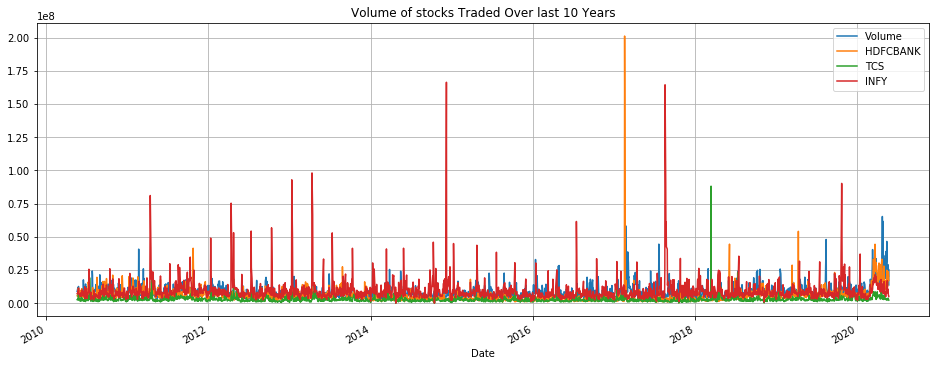

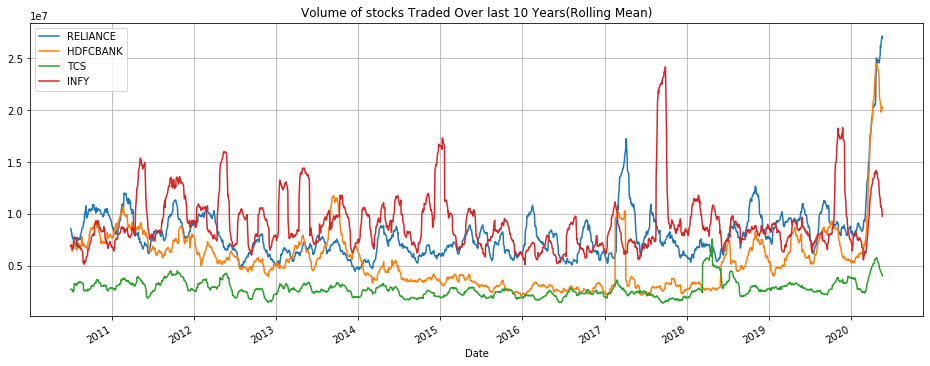

In [16]:
rel['Volume'].plot(figsize=(16,6),title='Volume of stocks Traded Over last 10 Years',grid=True)
hdfc['Volume'].plot(label='HDFCBANK',grid=True)
tcs['Volume'].plot(label='TCS',grid=True)
infy['Volume'].plot(label='INFY',grid=True)
plt.legend();
plt.show()
rel['Volume'].rolling(30).mean().plot(figsize=(16,6),label = 'RELIANCE',title='Volume of stocks Traded Over last 10 Years(Rolling Mean)',grid=True)
hdfc['Volume'].rolling(30).mean().plot(label='HDFCBANK',grid=True)
tcs['Volume'].rolling(30).mean().plot(label='TCS',grid=True)
infy['Volume'].rolling(30).mean().plot(label='INFY',grid=True)
plt.legend();


# Calculating Daily Returns

Daily return is the change in price with respect to the previous day.

Daily Return = (Price of share on Day 2 - Price of share on Day 1) / Price of share on Day 1

Daily return can be either positive or negative. It is positive when a stock gains value with respect to previous day and is negative when stock looses value. 

In [17]:
#Daily Returns
rel['Daily Returns']=rel['Adj Close'].pct_change()
hdfc['Daily Returns']=hdfc['Adj Close'].pct_change()
tcs['Daily Returns']=tcs['Adj Close'].pct_change()
infy['Daily Returns']=infy['Adj Close'].pct_change()


In [18]:
rel.tail()

,High,Low,Open,Close,Volume,Adj Close,Daily Returns
Date,,,,,,,
2020-05-15,1466.699951,1415.099976,1444.0,1459.400024,28683258.0,1459.400024,0.016331
2020-05-18,1482.000000,1428.000000,1470.0,1440.750000,28980385.0,1440.750000,-0.012779
2020-05-19,1461.699951,1403.250000,1457.0,1408.900024,19528760.0,1408.900024,-0.022107
2020-05-20,1446.849976,1393.000000,1410.0,1433.699951,25530626.0,1433.699951,0.017602
2020-05-21,1461.449951,1425.000000,1435.0,1443.500000,13655148.0,1443.500000,0.006835


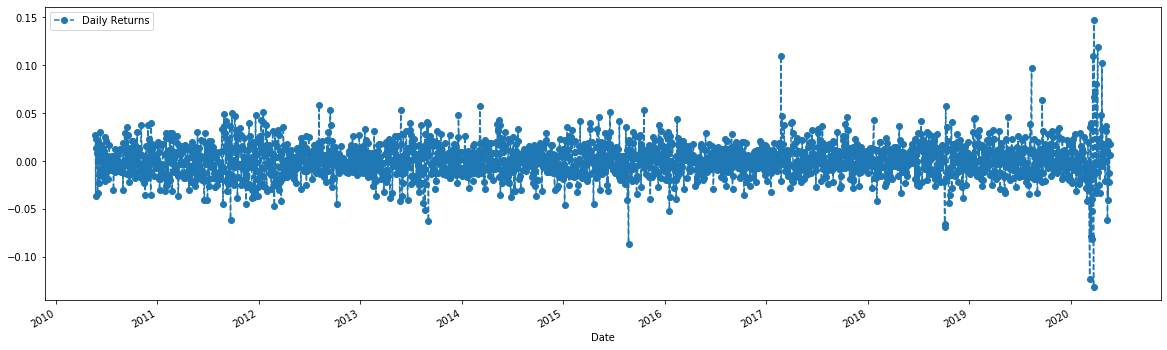

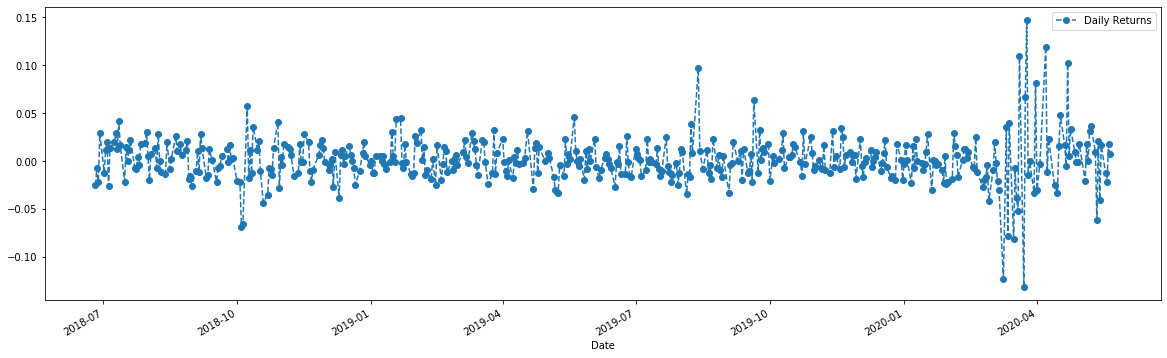

In [19]:
rel['Daily Returns'].plot(figsize=(20,6), legend=True, linestyle='--', marker='o')
plt.show()
rel['Daily Returns'].iloc[2000:].plot(figsize=(20,6), legend=True, linestyle='--', marker='o');

Lets Plot histogram of daily returns of stocks.

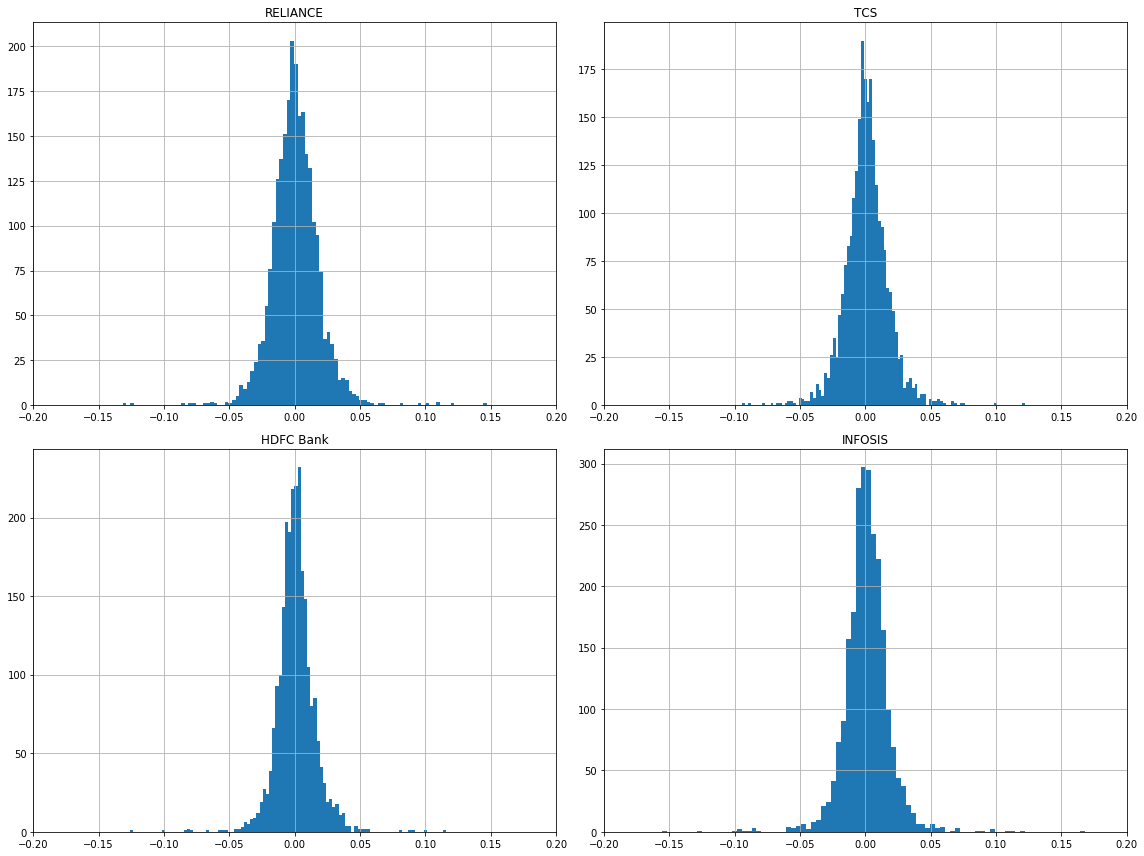

In [20]:
#Histogram
fig,axes = plt.subplots(nrows=2,ncols=2)
fig.set_figheight(12)
fig.set_figwidth(16)

rel['Daily Returns'].hist(ax=axes[0,0],bins=100)
axes[0,0].set_title('RELIANCE')
axes[0,0].set_xlim(-0.2,0.2)
tcs['Daily Returns'].hist(ax=axes[0,1],bins=100)
axes[0,1].set_title('TCS')
axes[0,1].set_xlim(-0.2,0.2)
hdfc['Daily Returns'].hist(ax=axes[1,0],bins=100)
axes[1,0].set_title('HDFC Bank')
axes[1,0].set_xlim(-0.2,0.2)
infy['Daily Returns'].hist(ax=axes[1,1],bins=100)
axes[1,1].set_title('INFOSIS')
axes[1,1].set_xlim(-0.2,0.2)
fig.show()

fig.tight_layout()

We can observe the shape of the histogram is different for each of the stock.
Thickness of the histogram tell us about the volatility of the stock as the daily return values do not fall close to zero.
- Higher the Volatility higher is the risk of investing. 
- Higher volatility also denotes higher returns or the higher losses. 

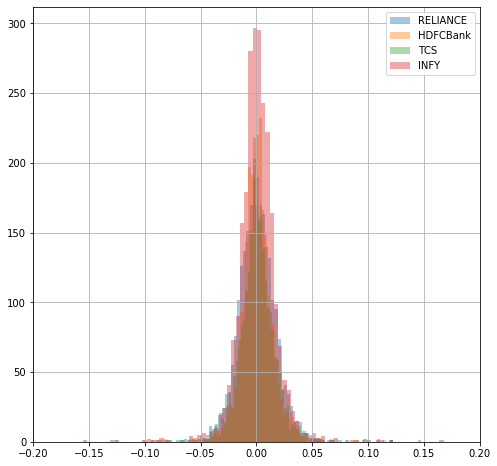

In [21]:
rel['Daily Returns'].hist(bins=100,label='RELIANCE',figsize=(8,8),alpha=0.4)
hdfc['Daily Returns'].hist(bins=100,label='HDFCBank',figsize=(8,8),alpha=0.4)
tcs['Daily Returns'].hist(bins=100,label='TCS',alpha=0.4)
infy['Daily Returns'].hist(bins=100,label='INFY',alpha=0.4)
plt.xlim(-0.2,0.2)
plt.legend();

This plot does not give much clearer picture. Lets try implementing it through Kernel density plot.

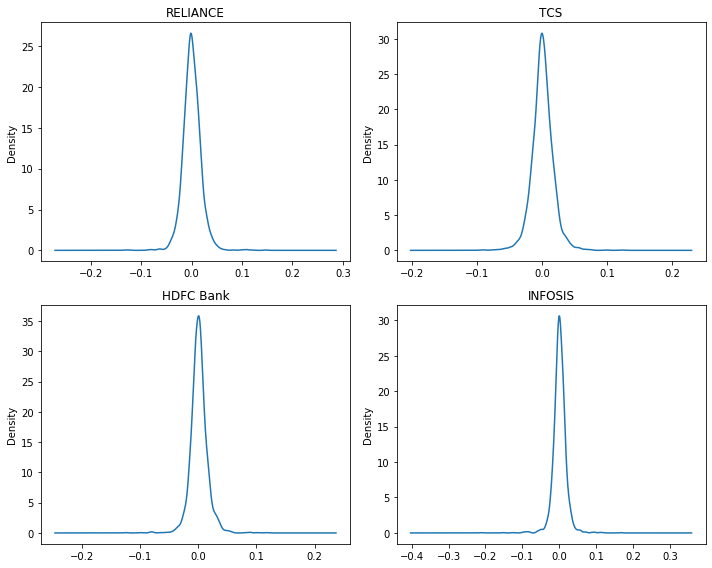

In [22]:
#Kernel Density plot to check
fig,axes = plt.subplots(nrows=2,ncols=2)
fig.set_figheight(8)
fig.set_figwidth(10)

rel['Daily Returns'].plot(kind='kde',ax=axes[0,0])
axes[0,0].set_title('RELIANCE')
#axes[0,0].set_xlim(-0.2,0.2)
tcs['Daily Returns'].plot(kind='kde',ax=axes[0,1])
axes[0,1].set_title('TCS')
#axes[0,1].set_xlim(-0.2,0.2)
hdfc['Daily Returns'].plot(kind='kde',ax=axes[1,0])
axes[1,0].set_title('HDFC Bank')
#axes[1,0].set_xlim(-0.2,0.2)
infy['Daily Returns'].plot(kind='kde',ax=axes[1,1])
axes[1,1].set_title('INFOSIS')
#axes[1,1].set_xlim(-0.2,0.2)
fig.show()

fig.tight_layout()

There is a observable difference between these plot and it tells Reliance and TCS have more volatility.

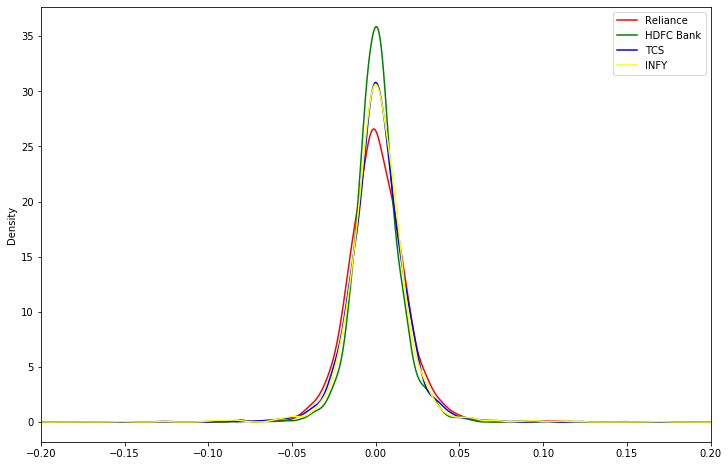

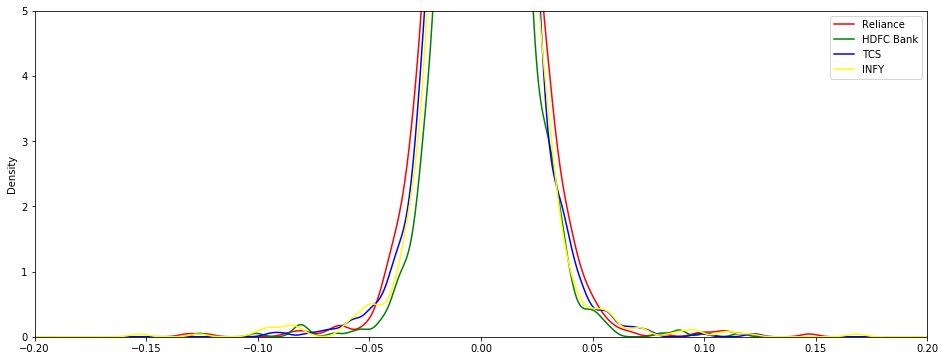

In [23]:
rel['Daily Returns'].plot(kind='kde', color='red', label='Reliance',figsize=(12,8))
hdfc['Daily Returns'].plot(kind='kde', color='green', label='HDFC Bank')
tcs['Daily Returns'].plot(kind='kde', color='blue', label='TCS')
infy['Daily Returns'].plot(kind='kde', color='yellow', label='INFY')
plt.xlim(-0.2,0.2)
plt.legend();
plt.show()
#Zoomed graph
rel['Daily Returns'].plot(kind='kde', color='red', label='Reliance',figsize=(16,6))
hdfc['Daily Returns'].plot(kind='kde', color='green', label='HDFC Bank')
tcs['Daily Returns'].plot(kind='kde', color='blue', label='TCS')
infy['Daily Returns'].plot(kind='kde', color='yellow', label='INFY')
plt.xlim(-0.2,0.2)
plt.ylim(0,5)
plt.legend();

This gives us a clear comparable observation that Reliance stock is most volatile and HDFC Bank has least volatility.

In [24]:
Stocks_Daily_Ret = pd.concat([rel['Daily Returns'],hdfc['Daily Returns'],tcs['Daily Returns'], infy['Daily Returns']],axis=1)
Stocks_Daily_Ret.columns = ['Reliance','HDFC','TCS','INFY']
Stocks_Daily_Ret.dropna()

,Reliance,HDFC,TCS,INFY
Date,,,,
2010-05-24,0.027221,-0.001095,-0.001530,0.007223
2010-05-25,-0.036181,-0.011400,-0.025153,-0.025765
2010-05-26,0.022726,0.013306,0.054964,0.086040
2010-05-27,0.014087,0.037669,0.005217,0.008510
2010-05-28,0.014087,0.000105,0.012065,0.012899
...,...,...,...,...
2020-05-15,0.016331,-0.006210,-0.004968,-0.008889
2020-05-18,-0.012779,-0.057986,0.027841,0.017783
2020-05-19,-0.022107,-0.007171,0.001568,0.007079


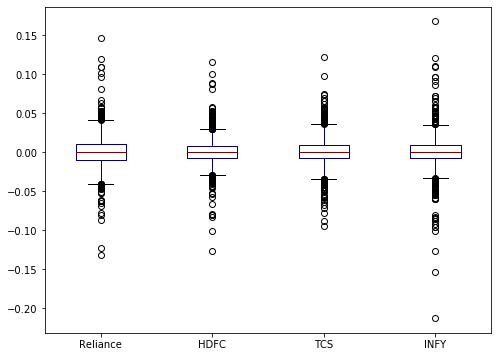

In [25]:
Stocks_Daily_Ret.plot(kind='box',figsize=(8,6),colormap='jet');

Box plot gives us clear much clearer analysis, Infosis stocks have two outliers, neglecting that reliance is the most volatile and HDFC is the least  

### Calculating Cumulative Returns of the Stocks

Cumulative returns is the total return earned in an investment irrespective of the time. It is the calculated by dividing current price of the stock by the price stock were bought. 

Cumulative return cannot be negative.

Cumulative Return = Current price of a unit share / Price at which the share was bought 

In [26]:
#Cumulative Returns
rel['Cumulative Returns']=rel['Adj Close']/rel['Adj Close'][0]
hdfc['Cumulative Returns']=hdfc['Adj Close']/hdfc['Adj Close'][0]
tcs['Cumulative Returns']=tcs['Adj Close']/tcs['Adj Close'][0]
infy['Cumulative Returns']=infy['Adj Close']/infy['Adj Close'][0]

In [27]:
Stocks_Cumulative_Ret = pd.concat([rel['Cumulative Returns'],hdfc['Cumulative Returns'],tcs['Cumulative Returns'], infy['Cumulative Returns']],axis=1)
Stocks_Cumulative_Ret.columns = ['Reliance','HDFC','TCS','INFY']
Stocks_Cumulative_Ret

,Reliance,HDFC,TCS,INFY
Date,,,,
2010-05-21,1.000000,1.000000,1.000000,1.000000
2010-05-24,1.027221,0.998905,0.998470,1.007223
2010-05-25,0.990056,0.987518,0.973355,0.981272
2010-05-26,1.012556,1.000657,1.026854,1.065700
2010-05-27,1.026819,1.038351,1.032211,1.074769
...,...,...,...,...
2020-05-15,3.413763,6.259462,7.030600,5.102051
2020-05-18,3.370138,5.896502,7.226338,5.192782
2020-05-19,3.295636,5.854216,7.237666,5.229544


In the last 10 years, TCS gave us the maximum return, amount invested in TCS stock have surged upto 7 times in last 10 years.
while Reliance gave us minimum return where prices surge upto 3.3 times approx.

### Compounded Annual Growth Rate(CAGR) over last 10 Years

In [28]:
Stock_Close = pd.concat([rel['Adj Close'],hdfc['Adj Close'],tcs['Adj Close'],infy['Adj Close']],axis=1)
Stock_Close.columns = ['Reliance','HDFC Bank','TCS','Infosis']
Stock_Close

,Reliance,HDFC Bank,TCS,Infosis
Date,,,,
2010-05-21,427.504791,141.889206,269.237335,127.850540
2010-05-24,439.141998,141.733871,268.825287,128.774033
2010-05-25,423.253540,140.118088,262.063446,125.456123
2010-05-26,432.872467,141.982437,276.467468,136.250336
2010-05-27,438.970154,147.330811,277.909760,137.409760
...,...,...,...,...
2020-05-15,1459.400024,888.150024,1892.900024,652.299988
2020-05-18,1440.750000,836.650024,1945.599976,663.900024
2020-05-19,1408.900024,830.650024,1948.650024,668.599976


In [29]:
nifty = web.DataReader('^NSEI','yahoo', start, end)
nifty.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-05-21,4946.700195,4842.299805,4946.700195,4931.149902,0.0,4931.149902
2010-05-24,5029.549805,4923.450195,4944.299805,4943.950195,0.0,4943.950195
2010-05-25,4946.600098,4786.450195,4945.299805,4806.750000,0.0,4806.750000
2010-05-26,4925.450195,4807.299805,4807.299805,4917.399902,0.0,4917.399902
2010-05-27,5016.600098,4897.600098,4915.149902,5003.100098,0.0,5003.100098


In [30]:
nifty['Cumulative Return'] = nifty['Adj Close'][-1]/nifty['Adj Close'][0]
nifty.tail()

,High,Low,Open,Close,Volume,Adj Close,Cumulative Return
Date,,,,,,,
2020-05-15,9182.400391,9050.000000,9182.400391,9136.849609,575900.0,9136.849609,1.85621
2020-05-18,9158.299805,8806.750000,9158.299805,8823.250000,773000.0,8823.250000,1.85621
2020-05-19,9030.349609,8855.299805,8961.700195,8879.099609,762200.0,8879.099609,1.85621
2020-05-20,9093.799805,8875.349609,8889.150391,9066.549805,622300.0,9066.549805,1.85621
2020-05-21,9178.549805,9056.099609,9079.450195,9153.250000,0.0,9153.250000,1.85621


In [31]:
Stock_Close=Stock_Close.join(nifty['Adj Close'],on='Date')
Stock_Close.columns = ['Reliance','HDFC Bank','TCS','Infosis','Nifty']
Stock_Close

,Reliance,HDFC Bank,TCS,Infosis,Nifty
Date,,,,,
2010-05-21,427.504791,141.889206,269.237335,127.850540,4931.149902
2010-05-24,439.141998,141.733871,268.825287,128.774033,4943.950195
2010-05-25,423.253540,140.118088,262.063446,125.456123,4806.750000
2010-05-26,432.872467,141.982437,276.467468,136.250336,4917.399902
2010-05-27,438.970154,147.330811,277.909760,137.409760,5003.100098
...,...,...,...,...,...
2020-05-15,1459.400024,888.150024,1892.900024,652.299988,9136.849609
2020-05-18,1440.750000,836.650024,1945.599976,663.900024,8823.250000
2020-05-19,1408.900024,830.650024,1948.650024,668.599976,8879.099609


In [32]:
CAGR = ((Stock_Close.iloc[-1]/Stock_Close.iloc[0])**(1/10) - 1)*100
CAGR

Reliance     12.939947
HDFC Bank    19.940580
TCS          22.155556
Infosis      18.147321
Nifty         6.380668
dtype: float64

Here we have calculated the Compounded Annual Growth rate of each of the stocks. With TCS topping the list and Reliance is at the bottom. 
We can observe that these stocks performed better than return from the overall market index.

### Lets find out Correlation between the stocks

In [33]:
from pandas.plotting import scatter_matrix

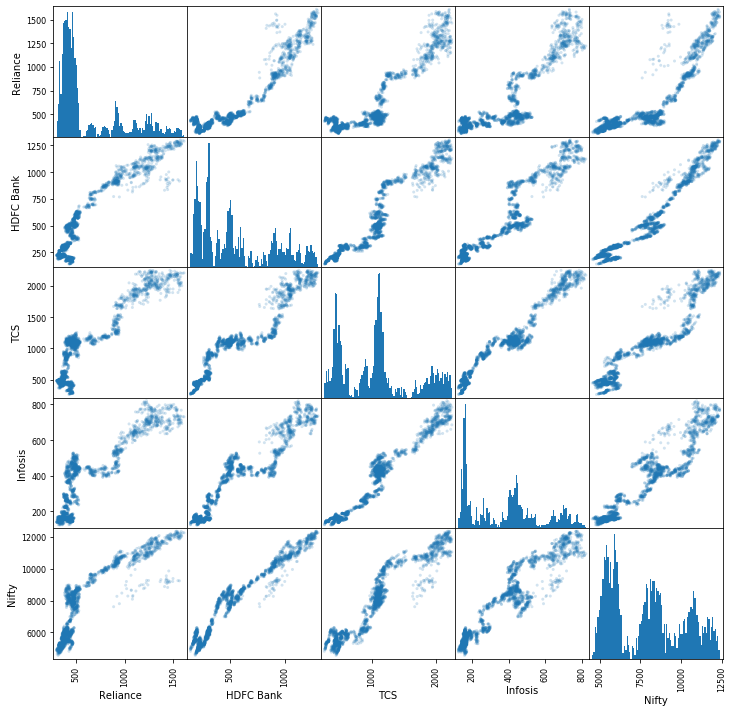

In [34]:
scatter_matrix(Stock_Close,figsize=(12,12),alpha=0.2,hist_kwds={'bins':100});

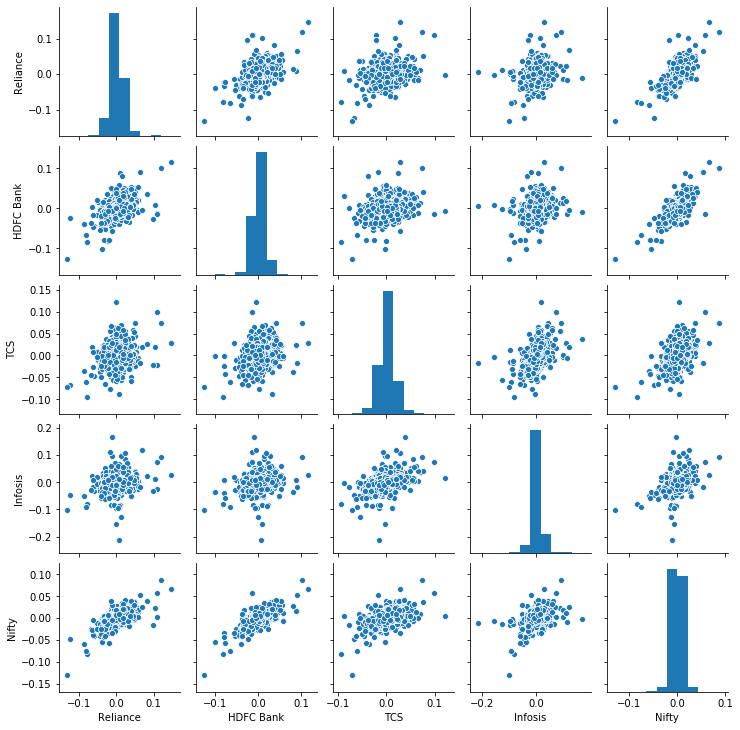

In [35]:
sns.pairplot(Stock_Close.pct_change().dropna(),size=2);

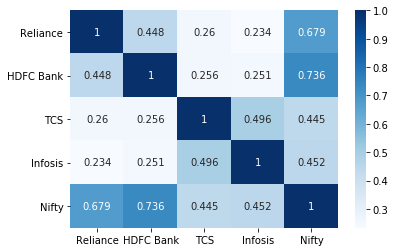

In [36]:
#Using Heatmap
sns.heatmap(Stock_Close.pct_change(1).corr(),annot=True,fmt=".3g",cmap='Blues');

Plot shows that TCS and Infosis are very likely correlated to each other and yes we can consider that as they are tech companies. Correlation here is very weak.
HDFC and reliance have good correlation with the market index.

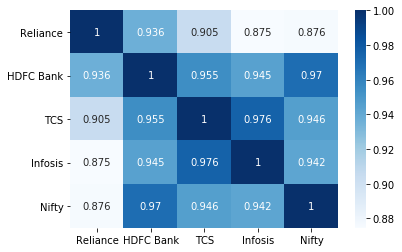

In [37]:
#Correlation between closing prices of the stocks using heat map
sns.heatmap(Stock_Close.corr(),annot=True,fmt=".3g",cmap='Blues');

Market Index is closely related to all the four stocks. Moreover we observe here is that TCS and INFOSIS have wonderful correlation between them as both of them are TECH companies.

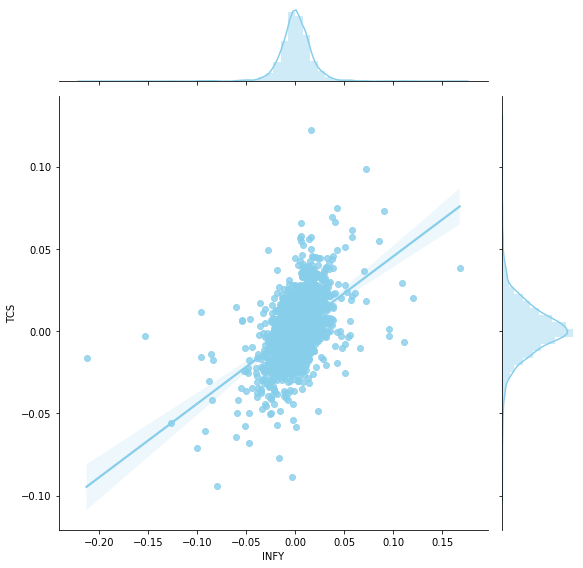

In [38]:
sns.jointplot('INFY','TCS',Stocks_Daily_Ret, kind='reg', size=8, color='skyblue');

## Calculating Simple Moving Average of the Stocks

Why do we calculate simple moving average?
Moving averages tells us that this is average or minimum possible return that we are likely to get in the near future. Moving averages change slowly in comparison to the actual price.  

In [39]:
#Calculating Moving Averages
rel['MA for 10 days'] = rel['Adj Close'].rolling(10).mean()
rel['MA for 50 days'] = rel['Adj Close'].rolling(50).mean()
rel['MA for 200 days'] = rel['Adj Close'].rolling(200).mean()

hdfc['MA for 10 days'] = hdfc['Adj Close'].rolling(10).mean()
hdfc['MA for 50 days'] = hdfc['Adj Close'].rolling(50).mean()
hdfc['MA for 200 days'] = hdfc['Adj Close'].rolling(200).mean()

tcs['MA for 10 days'] = tcs['Adj Close'].rolling(10).mean()
tcs['MA for 50 days'] = tcs['Adj Close'].rolling(50).mean()
tcs['MA for 200 days'] = tcs['Adj Close'].rolling(200).mean()

infy['MA for 10 days'] = infy['Adj Close'].rolling(10).mean()
infy['MA for 50 days'] = infy['Adj Close'].rolling(50).mean()
infy['MA for 200 days'] = infy['Adj Close'].rolling(200).mean()

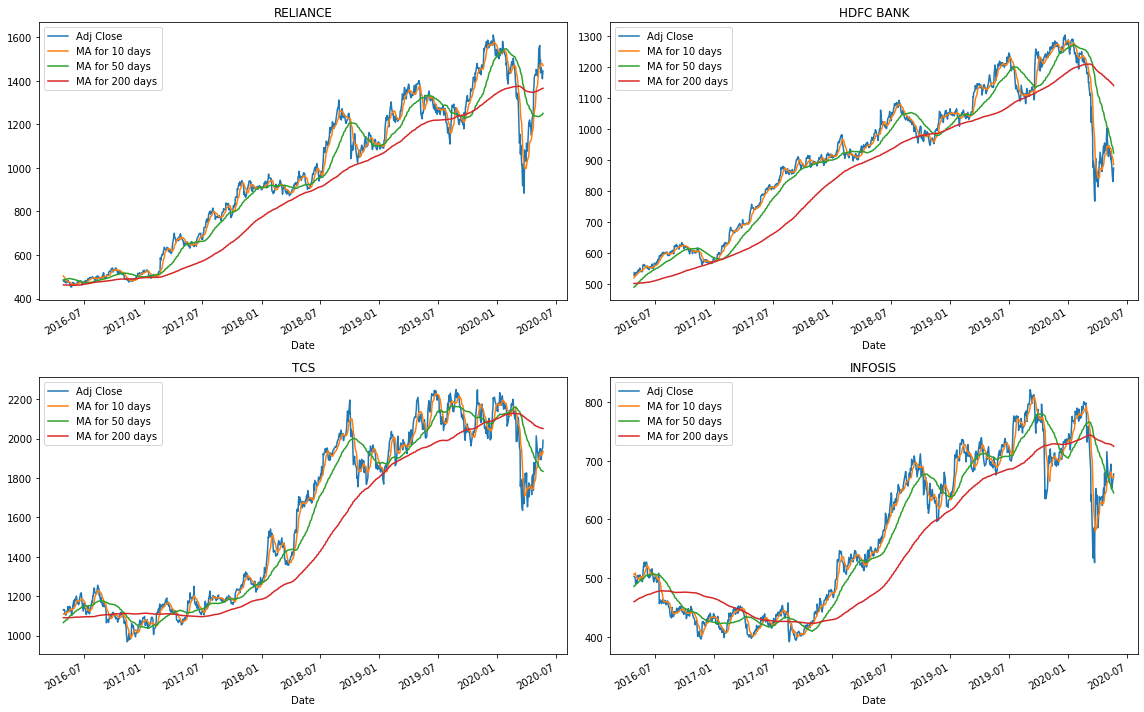

In [40]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(16)

rel[['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 200 days']][len(rel)-1000:].plot(ax=axes[0,0])
axes[0,0].set_title('RELIANCE')

hdfc[['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 200 days']][len(rel)-1000:].plot(ax=axes[0,1])
axes[0,1].set_title('HDFC BANK')

tcs[['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 200 days']][len(rel)-1000:].plot(ax=axes[1,0])
axes[1,0].set_title('TCS')

infy[['Adj Close', 'MA for 10 days', 'MA for 50 days', 'MA for 200 days']][len(rel)-1000:].plot(ax=axes[1,1])
axes[1,1].set_title('INFOSIS')

fig.tight_layout()

# Calculating Sharpe Ratio

Sharpe ratio also known as Risk Adjusted Return is the measure of excess return of a portfolio of stocks over the risk free return. It tells us whether the risk taken to earn the return over the risk free possible return, from a Investment security  is worth the taking a risk or not.

It helps us in choosing right stocks with minimum risk good amount of return. Sharpe Ratio is a term which is calculated annually, and it changes overtime. 

Sharpe ratio = (Annual Return - Risk Free Return) / Average Annual StDev.

In [41]:
#Risk Free Return that we get from other form investments such as Govt. bonds, fixed deposits, banks etc... 
risk_free_ret = 7     # Approx. 7 perc as per India

In [42]:
Stock_Close.drop(['Nifty'],axis=1,inplace=True)

In [43]:
def last_day(find_val):
    return find_val[-1]

lastdayofyear = Stock_Close.resample('A').apply(last_day)[1:10]
lastdayofyear

,Reliance,HDFC Bank,TCS,Infosis
Date,,,,
2011-12-31,302.673889,190.174362,455.559967,163.997940
2012-12-31,375.752014,307.147858,506.872894,156.448349
2013-12-31,409.672668,306.454132,904.217163,271.933228
2014-12-31,415.310120,445.441376,1098.123291,367.722137
2015-12-31,483.958435,514.223938,1083.945679,459.878082
2016-12-31,527.132874,582.657654,1090.948364,439.675659
2017-12-31,910.363464,916.567261,1295.471191,480.711365
2018-12-31,1115.074951,1051.955933,1847.181519,635.008240
2019-12-31,1514.050049,1272.099976,2141.158203,731.150024


In [44]:
def first_day(find_val):
    return find_val[0]

firstdayofyear = Stock_Close.resample('A').apply(first_day)[1:10]
firstdayofyear

,Reliance,HDFC Bank,TCS,Infosis
Date,,,,
2011-12-31,453.291138,198.352493,442.056122,184.670242
2012-12-31,308.614227,190.174362,462.605560,166.445450
2013-12-31,376.266724,309.818359,510.222900,155.783890
2014-12-31,406.743805,306.132019,896.407471,270.556396
2015-12-31,413.795502,445.652008,1092.680054,368.066681
2016-12-31,484.316193,517.360168,1074.845093,459.815765
2017-12-31,528.447693,578.261780,1089.011597,435.542542
2018-12-31,899.194580,907.805054,1268.806396,476.790222
2019-12-31,1114.826294,1065.045288,1856.695312,640.886658


In [45]:
#Annual Return in Stock price over each year
ann_ret = (lastdayofyear/firstdayofyear - 1) * 100
ann_ret

,Reliance,HDFC Bank,TCS,Infosis
Date,,,,
2011-12-31,-33.227486,-4.123029,3.054781,-11.194171
2012-12-31,21.754599,61.508551,9.569131,-6.006233
2013-12-31,8.878262,-1.085871,77.220027,74.557991
2014-12-31,2.106071,45.506301,22.502693,35.913304
2015-12-31,16.955944,15.386878,-0.799353,24.944231
2016-12-31,8.840646,12.621282,1.498195,-4.380038
2017-12-31,72.271253,58.503863,18.958439,10.370703
2018-12-31,24.008193,15.879057,45.584190,33.183990
2019-12-31,35.810400,19.440928,15.320925,14.084139


In [46]:
#Annual Standard Deviation of Stock over each year
ann_stdev = math.sqrt(252) * Stock_Close.pct_change(1).resample('A').std()[1:10] * 100
ann_stdev

,Reliance,HDFC Bank,TCS,Infosis
Date,,,,
2011-12-31,31.167137,28.337011,31.604627,30.805491
2012-12-31,25.615307,20.252097,26.104814,29.288437
2013-12-31,27.443574,29.663946,25.286590,36.828087
2014-12-31,23.575278,19.709092,26.237749,25.578076
2015-12-31,28.131053,18.554939,20.343863,27.709452
2016-12-31,21.697092,15.752042,23.090122,23.470196
2017-12-31,24.873231,13.429505,20.329980,22.669295
2018-12-31,26.679088,16.845300,25.907678,24.167460
2019-12-31,27.102041,19.772746,22.846581,27.423787


In [47]:
#Annual Sharpe Ratio of Last 9 Years
ASR =(ann_ret - risk_free_ret)/ann_stdev
ASR

,Reliance,HDFC Bank,TCS,Infosis
Date,,,,
2011-12-31,-1.290702,-0.392527,-0.124830,-0.590615
2012-12-31,0.576007,2.691502,0.098416,-0.444074
2013-12-31,0.068441,-0.272582,2.776967,1.834415
2014-12-31,-0.207587,1.953733,0.590855,1.130394
2015-12-31,0.353913,0.452002,-0.383376,0.647585
2016-12-31,0.084834,0.356861,-0.238275,-0.484872
2017-12-31,2.624157,3.835127,0.588217,0.148690
2018-12-31,0.637510,0.527094,1.489296,1.083440
2019-12-31,1.063034,0.629196,0.364209,0.258321


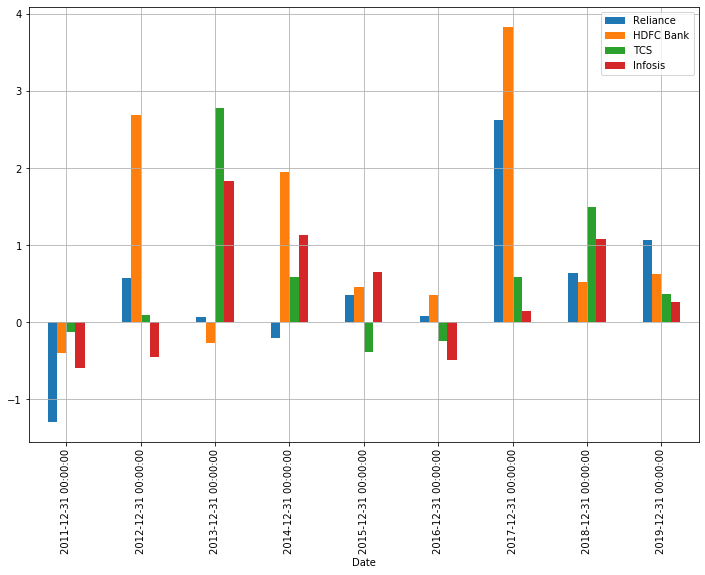

In [48]:
ASR.plot(kind = 'bar',figsize=(12,8),grid=True);

# Augmented Dickey Fuller test

AD Fuller test is a test of Stationarity of a time series data.

In [49]:
from statsmodels.tsa.stattools import adfuller

In [50]:
def test_stationarity(timeseries):

    
    print("Results of dickey fuller test")
    adft = adfuller(timeseries,regression='ct',autolag='AIC')
    output = pd.Series(adft[0:4],index=['Test Statistics','p-value','No. of lags used','Number of Observations used'])
    for key,values in adft[4].items():
        output['Critical Value (%s)'%key] =  values
    print(output)
    
test_stationarity(rel['Adj Close'])

Results of dickey fuller test
Test Statistics                  -2.019339
p-value                           0.590861
No. of lags used                 21.000000
Number of Observations used    2441.000000
Critical Value (1%)              -3.962484
Critical Value (5%)              -3.412290
Critical Value (10%)             -3.128110
dtype: float64


p-value>0.05 implies data is not stationary

### Decompostion of Time Series Data into Trend, Seasonality and Residual Components

In [51]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 432x288 with 0 Axes>

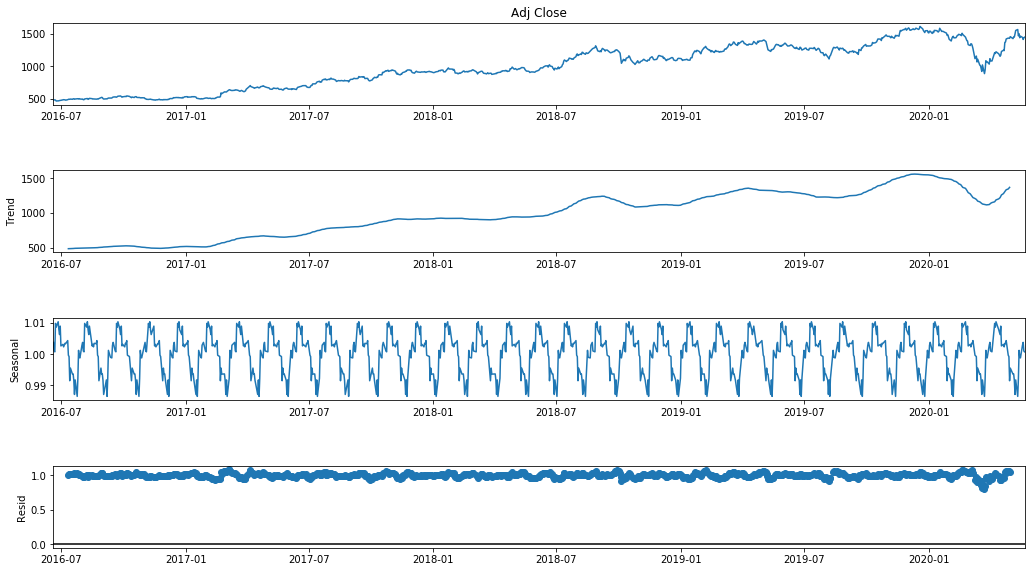

In [52]:
result = seasonal_decompose(rel['Adj Close'][1500:], model='multiplicative', freq = 30)
fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(16, 9)

# Calculating ACF & PACF

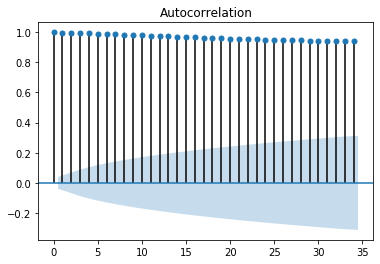

In [53]:
from statsmodels.graphics.tsaplots import plot_acf
fig=plot_acf(rel['Adj Close'])

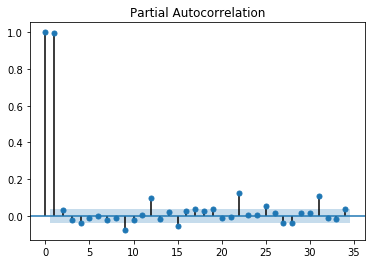

In [54]:
from statsmodels.graphics.tsaplots import plot_pacf
fig=plot_pacf(rel['Adj Close'])

# Auto Regressive Integrated Moving Average model

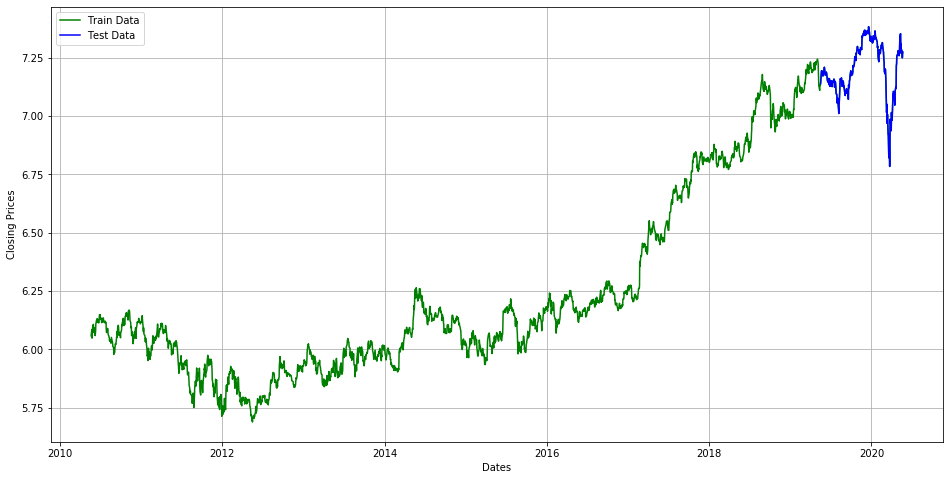

In [55]:
#splitting data into training and testing dataset
rel_log = np.log(rel['Adj Close'])
train_data, test_data = rel_log[3:int(len(rel_log)*0.9)], rel_log[int(len(rel_log)*0.9):]
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.plot(rel_log, 'green', label='Train Data')
plt.plot(test_data, 'blue', label='Test Data')
plt.legend();

We will use auto arima method to calculate p, d, q values for the arima model. Auto arima will give us values of p, d, q for the best fit of the arima model.

In [56]:
from statsmodels.tsa.arima_model import ARIMA
from pmdarima.arima import auto_arima

In [57]:
model_autoARIMA = auto_arima(train_data, start_p=0, start_q=0, test='adf', max_p=3, max_q=3, m=1, d=None, seasonal=False, 
                             start_P=0, D=0, trace=True, error_action='ignore', suppress_warnings=True, stepwise=True)
print(model_autoARIMA.summary())

Performing stepwise search to minimize aic
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=-11900.493, BIC=-11889.090, Time=0.452 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=-11901.892, BIC=-11884.787, Time=0.288 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=-11901.939, BIC=-11884.834, Time=0.960 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=-11900.582, BIC=-11894.881, Time=0.125 seconds
Fit ARIMA(1,1,1)x(0,0,0,0) [intercept=True]; AIC=-11899.905, BIC=-11877.098, Time=0.678 seconds
Fit ARIMA(0,1,2)x(0,0,0,0) [intercept=True]; AIC=-11899.990, BIC=-11877.183, Time=0.645 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=-11899.043, BIC=-11870.534, Time=0.365 seconds
Total fit time: 3.524 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2213
Model:               SARIMAX(0, 1, 1)   Log Likelihood                5953.969
Date:            

So p=0, d=1, q=1. 
p implies Auto Regressive so when p=0 implies AR is not used for calculation.
d implies Integrated so when d=1, it implies we are going to calculate differencing with lag=1. Differencing is done in order to make data stationary.
q implies Moving Average so when q=1 it implies we are going to calculate MA(1).

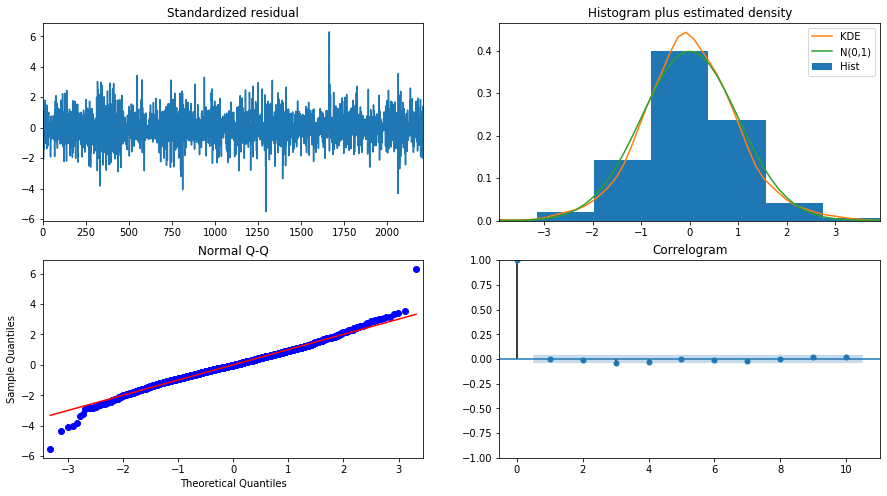

In [58]:
model_autoARIMA.plot_diagnostics(figsize=(15,8))
plt.show()

# ARIMA Plotting

In [59]:
model = ARIMA(train_data, order=(0, 1, 1))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Adj Close   No. Observations:                 2212
Model:                 ARIMA(0, 1, 1)   Log Likelihood                5953.970
Method:                       css-mle   S.D. of innovations              0.016
Date:                Thu, 21 May 2020   AIC                         -11901.941
Time:                        13:58:25   BIC                         -11884.836
Sample:                             1   HQIC                        -11895.692
                                                                              
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.0005      0.000      1.332      0.183      -0.000       0.001
ma.L1.D.Adj Close     0.0397      0.021      1.862      0.063      -0.002       0.081
                        

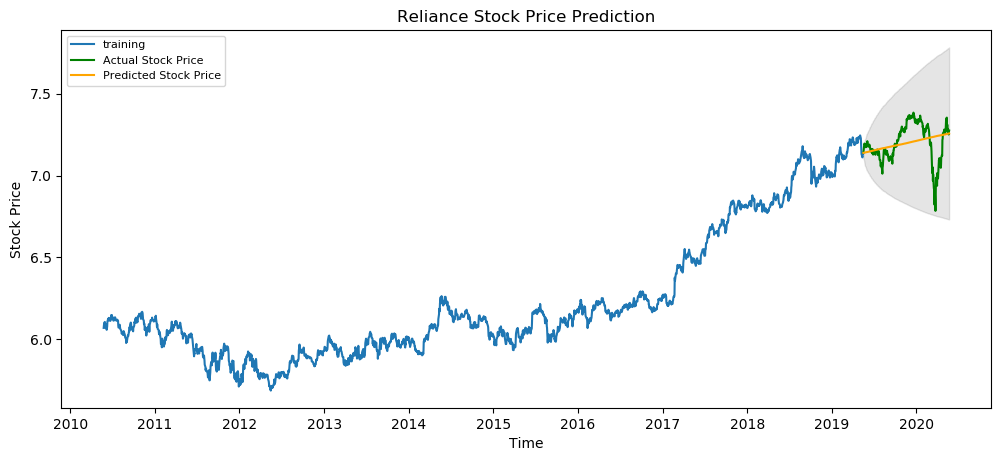

In [60]:
# Forecasting values
fc, se, conf = fitted.forecast(247, alpha=0.05)  # 95% confidence value
fc_series = pd.Series(fc, index=test_data.index)
lower_series = pd.Series(conf[:, 0], index=test_data.index)
upper_series = pd.Series(conf[:, 1], index=test_data.index)
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train_data, label='training')
plt.plot(test_data, color = 'green', label='Actual Stock Price')
plt.plot(fc_series, color = 'orange',label='Predicted Stock Price')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.10)
plt.title('Reliance Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend(loc='upper left', fontsize=8)

plt.show()

In [61]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [62]:
#Performance: 
mse = mean_squared_error(test_data, fc)
print('MSE: '+str(mse))
mae = mean_absolute_error(test_data, fc)
print('MAE: '+str(mae))
rmse = math.sqrt(mean_squared_error(test_data, fc))
print('RMSE: '+str(rmse))
mape = np.mean(np.abs(fc - test_data)/np.abs(test_data))
print('MAPE: '+str(mape))

MSE: 0.013480616482511146
MAE: 0.08527981157169269
RMSE: 0.11610605704488955
MAPE: 0.011903287064121382


# Monte Carlo Simulation

We are going to plot 100 Possible Simulations of Reliance Closing price for one Business year i.e. 252 days. 

In [63]:
log_ret = np.log(1 + rel['Adj Close'].pct_change())

In [64]:
log_ret.tail()

Date
2020-05-15    0.016199
2020-05-18   -0.012862
2020-05-19   -0.022355
2020-05-20    0.017449
2020-05-21    0.006812
Name: Adj Close, dtype: float64

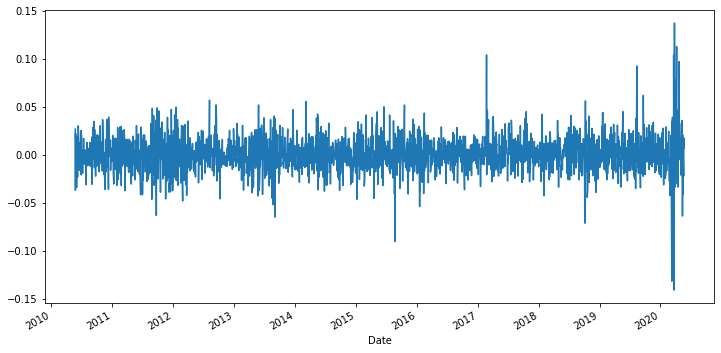

In [65]:
log_ret.plot(figsize=(12,6))

In [66]:
mu = log_ret.mean()
mu

0.0004942569062403709

In [67]:
var = log_ret.var()
var

0.0003235665380903012

   #### drift = mu - 0.5*var

In [68]:
drift = mu - 0.5*var
drift

0.0003324736371952203

In [69]:
stdev = log_ret.std()
stdev

0.01798795536158296

In [70]:
t_interval=252
iterations=100

#### daily_returns = exp(r)
#### r = drift + stdev * z

In [71]:
daily_returns = np.exp(np.array([drift]) + np.array([stdev])*norm.ppf(np.random.rand(t_interval,iterations)))

In [72]:
daily_returns

array([[0.96637901, 0.99532617, 1.00277009, ..., 0.99252029, 0.98611077,
        0.97762604],
       [0.97100842, 1.0068431 , 0.99063663, ..., 1.0265189 , 1.02717813,
        1.00191555],
       [0.95933685, 0.99683449, 0.99633103, ..., 0.98271215, 0.96658105,
        1.00804684],
       ...,
       [1.01532264, 0.98874172, 0.99425031, ..., 0.97274583, 0.97663012,
        0.98414771],
       [0.98624815, 0.99054585, 0.97904079, ..., 1.01114731, 0.97836888,
        1.00105591],
       [1.02858993, 0.99913126, 1.0079228 , ..., 0.96773449, 0.99656643,
        0.96720279]])

In [73]:
P0 = rel['Adj Close'].iloc[-1]
P0

1443.5

In [74]:
Future_Price = np.zeros_like(daily_returns)
Future_Price

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [75]:
Future_Price[0] = P0
Future_Price

array([[1443.5, 1443.5, 1443.5, ..., 1443.5, 1443.5, 1443.5],
       [   0. ,    0. ,    0. , ...,    0. ,    0. ,    0. ],
       [   0. ,    0. ,    0. , ...,    0. ,    0. ,    0. ],
       ...,
       [   0. ,    0. ,    0. , ...,    0. ,    0. ,    0. ],
       [   0. ,    0. ,    0. , ...,    0. ,    0. ,    0. ],
       [   0. ,    0. ,    0. , ...,    0. ,    0. ,    0. ]])

In [76]:
for x in range(1,t_interval):
    Future_Price[x] = Future_Price[x-1] * daily_returns[x]

In [77]:
Future_Price

array([[1443.5       , 1443.5       , 1443.5       , ..., 1443.5       ,
        1443.5       , 1443.5       ],
       [1401.65065443, 1453.37801768, 1429.98397595, ..., 1481.78003238,
        1482.7316303 , 1446.26509193],
       [1344.65512382, 1448.77733727, 1424.73741285, ..., 1456.16323431,
        1433.18030109, 1457.90295597],
       ...,
       [1116.68848571, 2161.43492934, 1685.88778713, ..., 1554.39645232,
        1173.9324491 ,  639.77633313],
       [1101.33194923, 2141.00039463, 1650.55290382, ..., 1571.72378506,
        1148.53897237,  640.45187628],
       [1132.81895126, 2139.14042685, 1663.62990542, ..., 1521.0113205 ,
        1144.5953825 ,  619.4468419 ]])

Text(0, 0.5, 'Stock Price')

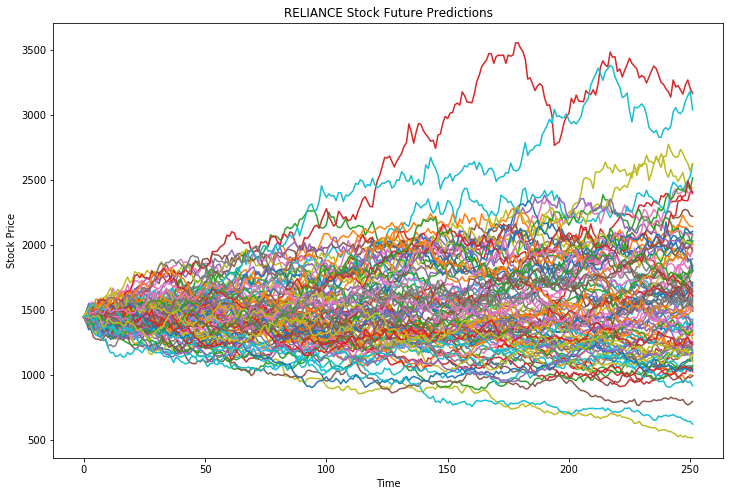

In [78]:
plt.figure(figsize=(12,8))
plt.plot(Future_Price)
plt.title('RELIANCE Stock Future Predictions')
plt.xlabel('Time')
plt.ylabel('Stock Price')

Monte Carlo model gave us 100 iterations of possible stock prices.

# Forecasting with Prophet

In [79]:
reliance = pd.DataFrame(rel['Adj Close'].reset_index())
reliance.columns = ['ds','y']
reliance

,ds,y
0,2010-05-21,427.504791
1,2010-05-24,439.141998
2,2010-05-25,423.253540
3,2010-05-26,432.872467
4,2010-05-27,438.970154
...,...,...
2458,2020-05-15,1459.400024
2459,2020-05-18,1440.750000
2460,2020-05-19,1408.900024
2461,2020-05-20,1433.699951


In [80]:
import fbprophet

In [81]:
pred = fbprophet.Prophet()

In [82]:
pred.fit(reliance)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [83]:
future = pred.make_future_dataframe(periods=365)

In [84]:
future.tail()

,ds
2823,2021-05-17
2824,2021-05-18
2825,2021-05-19
2826,2021-05-20
2827,2021-05-21


In [85]:
forecast_val = pred.predict(future)
forecast_val.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
2823,2021-05-17,1680.582406,1591.470295,1770.996175,1639.917888,1726.552163,-3.676451,-3.676451,-3.676451,4.602799,4.602799,4.602799,-8.279250,-8.279250,-8.279250,0.0,0.0,0.0,1676.905955
2824,2021-05-18,1681.177970,1592.136192,1770.528650,1640.375563,1727.388379,-3.113969,-3.113969,-3.113969,5.707519,5.707519,5.707519,-8.821489,-8.821489,-8.821489,0.0,0.0,0.0,1678.064001
2825,2021-05-19,1681.773535,1584.617573,1775.053564,1640.833239,1728.181002,-4.730769,-4.730769,-4.730769,4.583896,4.583896,4.583896,-9.314664,-9.314664,-9.314664,0.0,0.0,0.0,1677.042766
2826,2021-05-20,1682.369100,1595.896348,1771.749463,1641.189147,1729.116232,-4.237324,-4.237324,-4.237324,5.512623,5.512623,5.512623,-9.749947,-9.749947,-9.749947,0.0,0.0,0.0,1678.131776
2827,2021-05-21,1682.964664,1585.919587,1768.959315,1641.535661,1729.993566,-4.648397,-4.648397,-4.648397,5.471120,5.471120,5.471120,-10.119518,-10.119518,-10.119518,0.0,0.0,0.0,1678.316267


In [86]:
forecast_val.describe()

,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
count,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000,2828.000000,2828.0,2828.0,2828.0,2828.000000
mean,750.591952,677.465369,833.160670,748.659868,752.711780,4.553838,4.553838,4.553838,4.508630,4.508630,4.508630,0.045208,0.045208,0.045208,0.0,0.0,0.0,755.145790
std,451.726276,449.741924,451.495976,448.010292,455.887765,13.827876,13.827876,13.827876,3.442532,3.442532,3.442532,13.388848,13.388848,13.388848,0.0,0.0,0.0,450.418224
min,331.074940,216.468783,375.782853,331.074940,331.074940,-53.006271,-53.006271,-53.006271,-12.938979,-12.938979,-12.938979,-40.187936,-40.187936,-40.187936,0.0,0.0,0.0,297.554914
25%,407.321716,333.768445,487.684252,407.321716,407.321716,-1.308749,-1.308749,-1.308749,4.602799,4.602799,4.602799,-6.018837,-6.018837,-6.018837,0.0,0.0,0.0,411.280130
50%,460.930201,391.145186,546.323574,460.930201,460.930201,7.401262,7.401262,7.401262,5.471120,5.471120,5.471120,2.770186,2.770186,2.770186,0.0,0.0,0.0,468.749606
75%,1158.123272,1095.678765,1251.383308,1158.123272,1158.123272,14.067159,14.067159,14.067159,5.512623,5.512623,5.512623,9.338623,9.338623,9.338623,0.0,0.0,0.0,1173.537809
max,1682.964664,1596.151648,1776.172218,1641.535661,1729.993566,25.299160,25.299160,25.299160,5.707519,5.707519,5.707519,19.592718,19.592718,19.592718,0.0,0.0,0.0,1678.316267


In [87]:
reliance.describe()

,y
count,2463.000000
mean,633.706860
std,349.417561
min,295.313965
25%,395.792130
50%,460.728851
75%,889.236450
max,1609.949951


Text(0.5, 1, 'RELIANCE Stock Prediction plot')

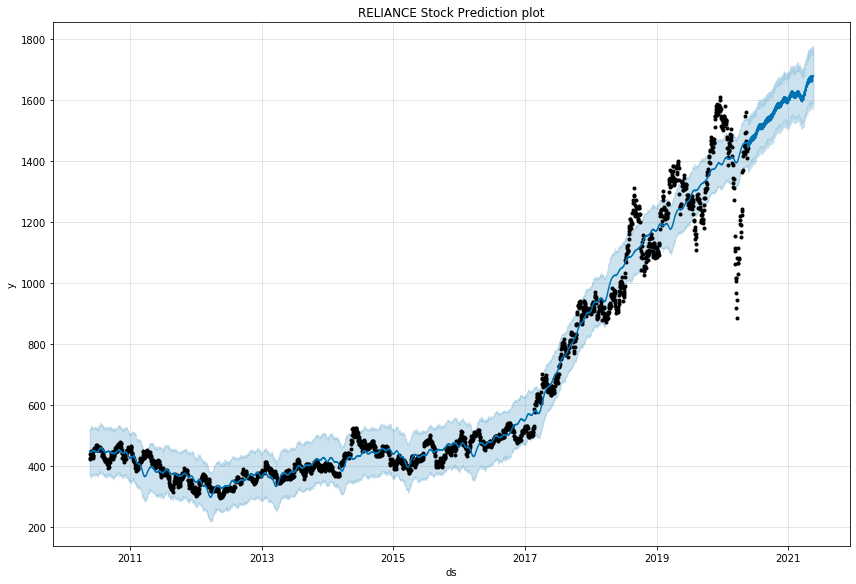

In [88]:
#Daily predictions
fig = pred.plot(forecast_val, figsize=(12,8))
plt.title('RELIANCE Stock Prediction plot')

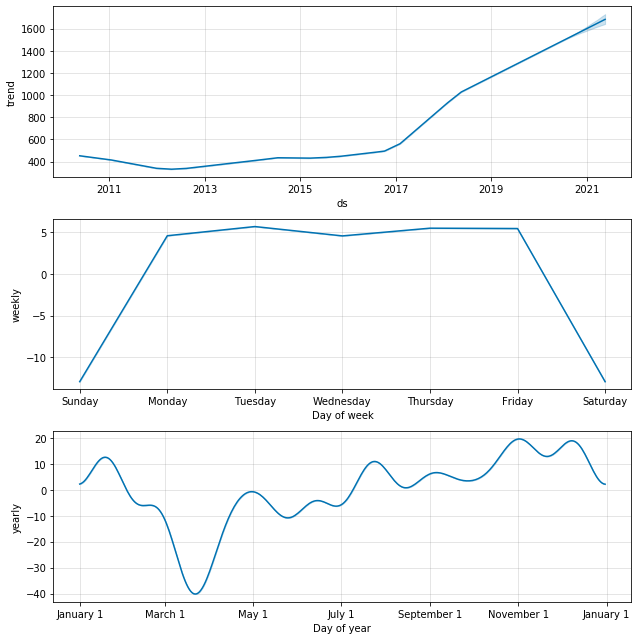

In [89]:
fig2 = pred.plot_components(forecast_val)
plt.show()